<a href="https://colab.research.google.com/github/EunSik312/lecture-deeplearning/blob/main/8%EC%9B%944%EC%9D%BC_%EC%B9%BC%EB%A7%8C_%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 Lab: 칼만필터와 데이터 추적기법 (Kalman Filter and Data Tracking)
이 노트북은 자율주행 데이터 처리 강의의 첫 번째 실습입니다. 각 실습은 Python 표준 라이브러리, NumPy, matplotlib만 사용하며, 센서 데이터의 노이즈 보정과 융합을 다룹니다.


## Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기

**목표:**
- 노이즈가 섞인 1차원 위치 데이터를 Kalman Filter로 보정합니다.
- Python 표준 라이브러리만 사용합니다.

**단계:**
1. `random.gauss`로 노이즈가 있는 위치 데이터 10개를 생성하세요.
2. 칼만필터의 예측-갱신 과정을 코드로 구현하세요.
3. 보정된 최종 위치 추정값을 출력하세요.

**예상 출력:**
- 보정 전 위치 리스트, 보정 후 최종 추정값


In [29]:
import random
# 실제 위치는 0, 노이즈가 섞인 측정값 10개 생성
measurements = [0 + random.gauss(0, 2.0) for _ in range(10)]

estimate = 0.0 # 초기 추정값
error_in_estimate = 1.0 # 초기 추정 오차
measurement_error = 0.5 # 센서 측정값에 포함된 불확실성(오차)

for z in measurements:
    #칼만 이득 계산
    k = error_in_estimate / (error_in_estimate + measurement_error)
    # 추정값 갱신
    estimate = estimate + k * (z - estimate)
    # 추정 오차 갱신
    error_in_estimate = (1 - k) * error_in_estimate

print(f"최종 추정값: {estimate:.2f}")


최종 추정값: 0.66


In [ ]:
#🔍 핵심 원인: random.gauss(0, 2.0)는 매번 다른 값을 생성함
#python
measurements = [0 + random.gauss(0, 2.0) for _ in range(10)]
#여기에서 random.gauss(0, 2.0)는 평균 0, 표준편차 2.0인 정규분포에서 임의의 값을 10개 생성합니다.
#즉, 실행할 때마다 measurements 리스트의 값이 다르게 생성됩니다.

#👉 매번 입력이 바뀌니까 당연히 최종 추정값도 달라집니다.

## Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습

**목표:**
- GPS와 IMU(속도계) 데이터를 가중 평균으로 융합하여 더 정확한 위치를 추정합니다.
- Python 표준 라이브러리만 사용합니다.

**단계:**
1. `random.gauss`로 GPS 위치 데이터 10개, IMU 위치 데이터 10개를 각각 생성하세요.
2. 두 센서의 신뢰도를 다르게 설정하고(예: GPS: 0.6, IMU: 0.4), 가중 평균으로 융합하세요.
3. 융합 결과 리스트를 출력하세요.

**예상 출력:**
- GPS, IMU, 융합 위치 리스트

In [66]:
# 센서 융합 (GPS + IMU) 가중 평균 예제
import random

# Step 1: GPS, IMU 위치 데이터 생성
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(5)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(5)]

# Step 2: 신뢰도(가중치) 설정, 생각해 봐야할 거리, 바꿔보는 값
#★★★★★★
w_gps = 0.2
w_imu = 0.8
#★★★★★★
#✅ 원칙: 가중치 합은 1로 설정해야 함
#센서 융합에서 가중 평균을 쓰는 이유는 신뢰도에 따라 센서 값을 적절히 섞기 위함입니다.
#따라서 가중치의 합이 1이 되도록 설정해야 합니다

# Step 3: 가중 평균 융합
## FILL THIS
fused_positions= [ w_gps * g + w_imu * i for g, i in zip(gps_positions, imu_positions)]

print('GPS:', gps_positions)
print('IMU:', imu_positions)
print('융합:', fused_positions)



GPS: [-0.6590917733289964, 0.5862968941594487, 1.5345131307797075, 0.6777778098293157, -0.8132534649486757]
IMU: [-1.2271554684712551, 0.27856211194763325, 1.3450154649955612, 1.6703987344362494, -2.0793395150480016]
융합: [-1.1135427294428033, 0.3401090683899963, 1.3829149981523905, 1.4718745495148626, -1.8261223050281365]


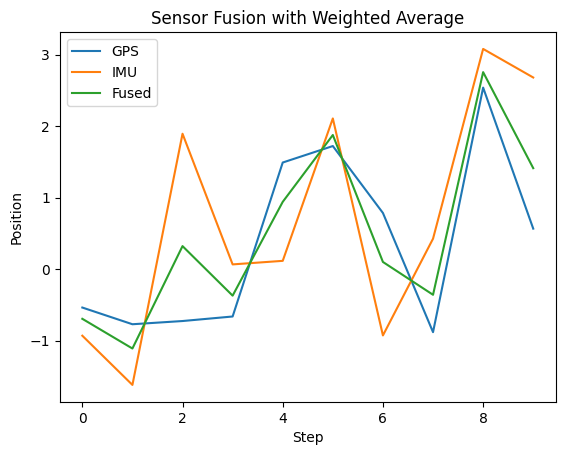

In [33]:
!pip install matplotlib

# 센서 융합 (GPS + IMU) 가중 평균 예제
import random
import matplotlib.pyplot as plt

# Step 1: GPS, IMU 위치 데이터 생성
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]

# Step 2: 신뢰도(가중치) 설정, 생각해 봐야할 거리, 바꿔보는 값
#★★★★★★
w_gps = 0.6
w_imu = 0.4
#★★★★★★

# Step 3: 가중 평균 융합
fused_positions = [w_gps * g + w_imu * i for g, i in zip(gps_positions, imu_positions)]
## FILL THIS

# Step 4: 시각화
plt.plot(gps_positions, label='GPS')
plt.plot(imu_positions, label='IMU')
plt.plot(fused_positions, label='Fused')
plt.legend()
plt.title('Sensor Fusion with Weighted Average')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

## Lab 3: CSV 데이터에 칼만필터 적용 및 시각화

**목표:**
- CSV 파일(또는 생성된 데이터)에서 위치 데이터를 불러와 칼만필터로 보정하고, 결과를 시각화합니다.
- Python 표준 라이브러리, NumPy, matplotlib 사용

**단계:**
1. (선택) CSV 파일이 없으면 `random.gauss`로 데이터 생성
2. 칼만필터로 보정된 위치 계산
3. matplotlib으로 원본 vs. 보정 데이터 플롯

**예상 출력:**
- 원본/보정 위치 리스트, 플롯 이미지

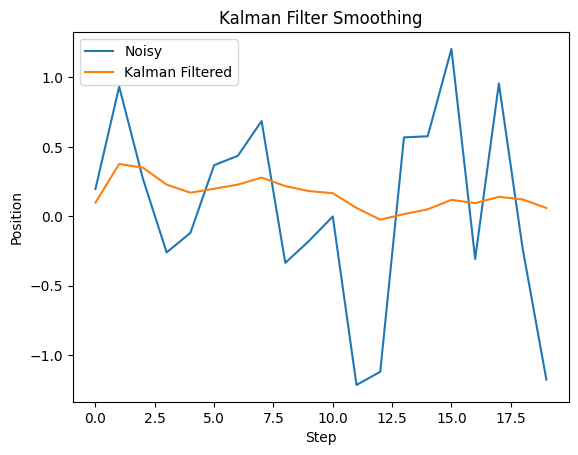

In [76]:
# 칼만필터로 CSV(또는 생성) 데이터 보정 및 시각화
import random
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 데이터 불러오기 또는 생성
try:
    import pandas as pd
    data = pd.read_csv('positions.csv')
    measured_positions = data['position'].tolist()
except Exception:
    measured_positions = [random.gauss(0, 1) for _ in range(20)]

# Step 2: 칼만필터 적용
estimate = 0
estimate_error = 1
measurement_error = 1
estimates = []
for z in measured_positions:
    # 1. 칼만 이득 계산
    kalman_gain = estimate_error / (estimate_error + measurement_error)

    # 2. 추정값 갱신
    estimate = estimate + kalman_gain * (z - estimate)

    # 3. 추정 오차 갱신
    estimate_error = (1 - kalman_gain) * estimate_error

    estimates.append(estimate)

# Step 3: 시각화
plt.plot(measured_positions, label='Noisy')
plt.plot(estimates, label='Kalman Filtered')
plt.legend()
plt.title('Kalman Filter Smoothing')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

| 항목                   | 설명                           |
| -------------------- | ---------------------------- |
| `measured_positions` | CSV가 없으면 랜덤 Gaussian 노이즈로 생성 |
| `kalman_gain`        | 추정값과 측정값의 신뢰 비율 계산           |
| `estimate`           | 칼만 이득을 이용해 추정값 업데이트          |
| `estimate_error`     | 보정 후 추정 오차 업데이트              |
| `plt.plot(...)`      | 원래 noisy 값과 보정된 값을 비교 시각화    |


| 항목     | 특징                        |
| ------ | ------------------------- |
| 노이즈 제거 | 측정값의 진동/불안정성을 줄임          |
| 반응 속도  | 센서값 변화에 빠르게 반응하되, 과민하지 않음 |
| 데이터 정제 | 실제 위치에 더 가까운 "예측된 위치" 제공  |



### 오늘의 실습 정리
- 칼만필터로 노이즈 데이터 보정, 센서 융합, 시각화까지 경험했습니다.
- Colab에서 결과(플롯, 수치)를 저장해 제출하세요.
- 질문은 강의 포럼/이메일로!
